In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
#library(vioplot)
#library(ascii)
#library(descr)

library(repr)
options(repr.plot.width=5, repr.plot.height=4)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
## load state murders data
state <- read.csv(file.path( 'data', 'state.csv'))
head(state)
state_asc <- state
state_asc[["Population"]] <- formatC(state_asc[["Population"]], format="d", digits=0, big.mark=",")
head(state_asc)

State,Population,Murder.Rate,Abbreviation
Alabama,4779736,5.7,AL
Alaska,710231,5.6,AK
Arizona,6392017,4.7,AZ
Arkansas,2915918,5.6,AR
California,37253956,4.4,CA
Colorado,5029196,2.8,CO


State,Population,Murder.Rate,Abbreviation
Alabama,"4,779,736",5.7,AL
Alaska,"710,231",5.6,AK
Arizona,"6,392,017",4.7,AZ
Arkansas,"2,915,918",5.6,AR
California,"37,253,956",4.4,CA
Colorado,"5,029,196",2.8,CO


In [4]:
## Mean and Median
paste("Mean = ",mean(state[["Population"]]))
paste("Trimmed Mean = ",mean(state[["Population"]], trim=0.1))
paste("Median = ",median(state[["Population"]]))

[1] "Mean =  6162876.3"

[1] "Trimmed Mean =  4783697.125"

[1] "Median =  4436369.5"

In [5]:
## Mean vs weighted.mean
paste("Mean = ",mean(state[["Murder.Rate"]]))
library("matrixStats")
paste("Weighted Mean = ",weighted.mean(state[["Murder.Rate"]], w=state[["Population"]]))


[1] "Mean =  4.066"

Warning message:
"package 'matrixStats' was built under R version 3.6.2"
Attaching package: 'matrixStats'

The following object is masked from 'package:dplyr':

    count



[1] "Weighted Mean =  4.44583398112339"

In [6]:
## SD, IQR and MAD
paste("standard deviation = ",sd(state[["Population"]]))
paste("Interquantile Range = ",IQR(state[["Population"]]))
paste("MAD = ",mad(state[["Population"]]))

[1] "standard deviation =  6848235.34740114"

[1] "Interquantile Range =  4847308"

[1] "MAD =  3849870.3852"

In [7]:
## Percentiles
quantile(state[["Murder.Rate"]], p=c(.05, .25, .5, .75, .95))

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

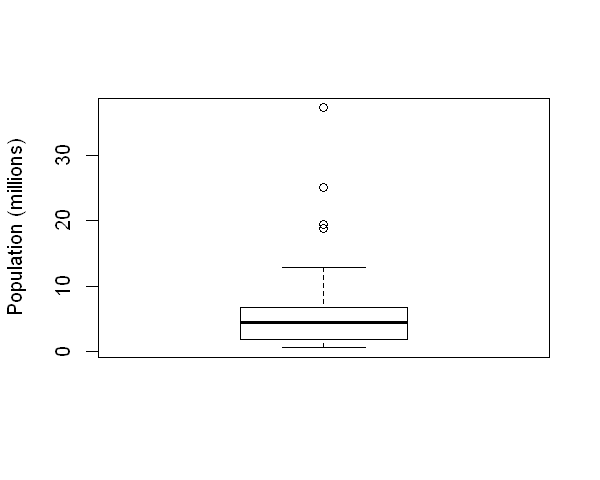

In [8]:
## boxplot
boxplot(state[["Population"]]/1000000, ylab="Population (millions)")

In [77]:
## Frecuecy table
breaks <- seq(from=min(state[["Population"]]), to=max(state[["Population"]]), length=11)
pop_freq <- cut(state[["Population"]], breaks=breaks, right=TRUE, include.lowest = TRUE)

state['PopFreq'] <- pop_freq
table(pop_freq)


pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1 

In [58]:
## Code for FreqTable
state_abb <- state %>%
  arrange(Population) %>%
  group_by(PopFreq) %>%
  summarize(state = paste(Abbreviation, collapse=","), .drop=FALSE) %>%
  complete(PopFreq, fill=list(state='')) %>%
  select(state) 

state_abb <- unlist(state_abb)

lower_br <- formatC(breaks[1:10], format="d", digits=0, big.mark=",")
upper_br <- formatC(c(breaks[2:10]-1, breaks[11]), format="d", digits=0, big.mark=",")

pop_table <- data.frame("BinNumber"=1:10,
                        "BinRange"=paste(lower_br, upper_br, sep="-"),
                        "Count"=as.numeric(table(pop_freq)),
                        "States"=state_abb)
pop_table

,BinNumber,BinRange,Count,States
state1,1,"563,626-4,232,658",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,NV,UT,KS,AR,MS,IA,CT,OK,OR"
state2,2,"4,232,659-7,901,691",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
state3,3,"7,901,692-11,570,724",6,"VA,NJ,NC,GA,MI,OH"
state4,4,"11,570,725-15,239,757",2,"PA,IL"
state5,5,"15,239,758-18,908,790",1,FL
state6,6,"18,908,791-22,577,823",1,NY
state7,7,"22,577,824-26,246,856",1,TX
state8,8,"26,246,857-29,915,889",0,
state9,9,"29,915,890-33,584,922",0,
state10,10,"33,584,923-37,253,956",1,CA


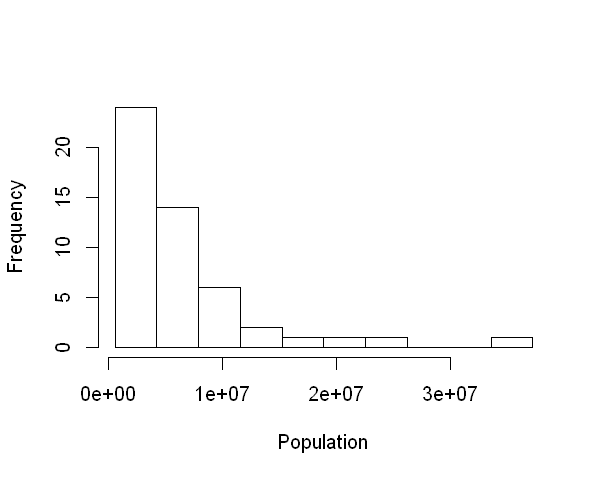

In [60]:
## Histogram
pop_hist <- hist(state[["Population"]], breaks=breaks,
                 xlab="Population", main="")

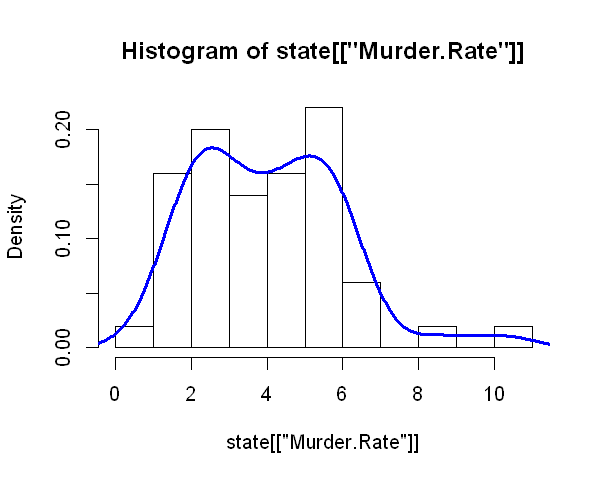

In [12]:
## Density plot
hist(state[["Murder.Rate"]], freq=FALSE )
lines(density(state[["Murder.Rate"]]), lwd=3, col="blue")

In [62]:
## Load dfw_airline.csv
dfw <- read.csv(file.path('data', 'dfw_airline.csv'))
100*as.matrix(dfw/sum(dfw))

Carrier,ATC,Weather,Security,Inbound
23.02299,30.40078,4.025214,0.1229373,42.42808


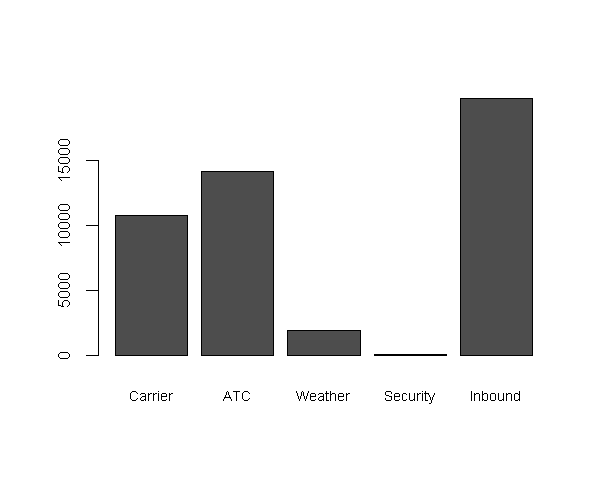

In [17]:
## barplot
barplot(as.matrix(dfw)/6, cex.axis = 0.8, cex.names = 0.7)

In [73]:
## Code for CorrTable
sp500_px <- read.csv(file.path('data', 'sp500_data.csv'))
sp500_sym <- read.csv(file.path('data', 'sp500_sectors.csv'), stringsAsFactors = FALSE)

telecom <- sp500_px[, sp500_sym[sp500_sym$sector=="telecommunications_services", 'symbol']]
print(nrow(telecom))
#telecom <- telecom[row.names(telecom)>"2012-07-01", ]
#print(nrow(telecom))
telecom_cor <- cor(telecom)
telecom_cor

[1] 5647


,T,CTL,FTR,VZ,LVLT
T,1.00000000,0.40585278,0.28327866,0.61703529,0.06154493
CTL,0.40585278,1.00000000,0.37764400,0.38575180,0.05453432
FTR,0.28327866,0.37764400,1.00000000,0.28929482,0.06731346
VZ,0.61703529,0.38575180,0.28929482,1.00000000,0.04591859
LVLT,0.06154493,0.05453432,0.06731346,0.04591859,1.00000000


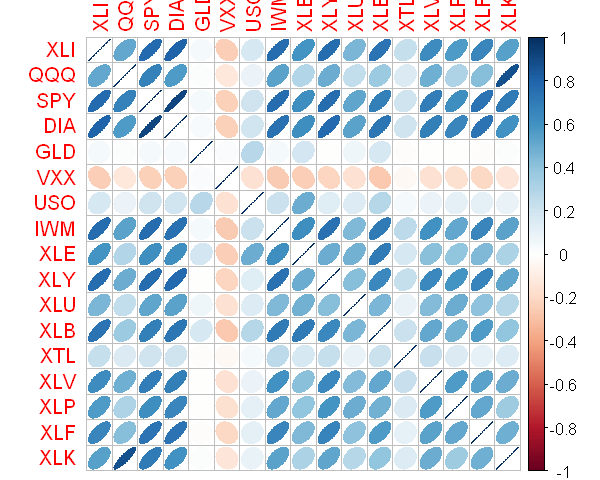

In [74]:
## Code for corrpolot
library(corrplot)
etfs <- sp500_px[, sp500_sym[sp500_sym$sector=="etf", 'symbol']]
corrplot(cor(etfs), method = "ellipse")

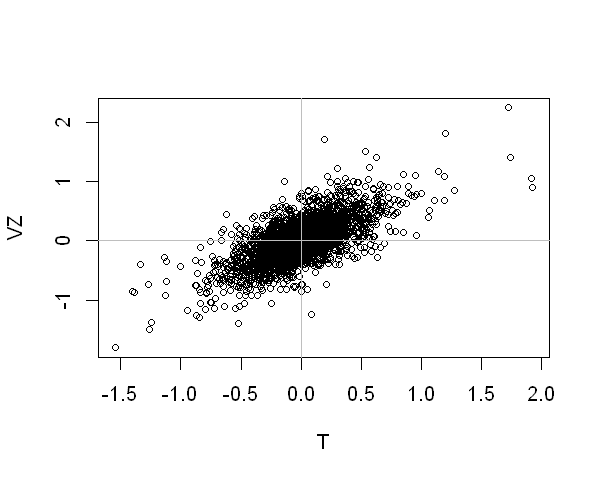

In [26]:
## Code ScatterPlot

plot(telecom$T, telecom$VZ, xlab="T", ylab="VZ", cex=.8)
abline(h=0, v=0, col="grey")

[1] 498249

[1] 432693

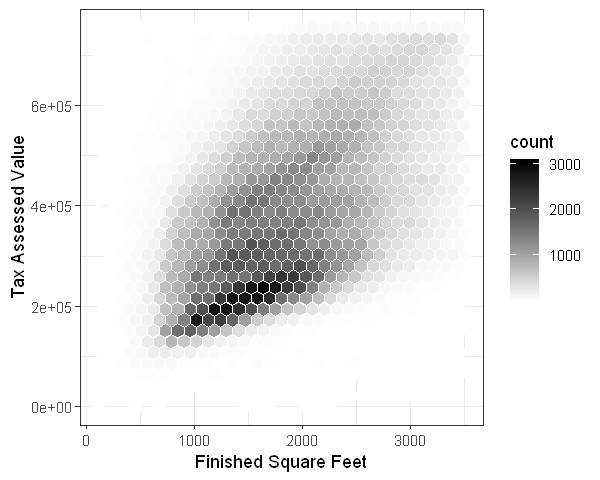

In [76]:
## Code Hexagonal bins
kc_tax <- read.csv(file.path( 'data', 'kc_tax.csv'))
kc_tax0 <- subset(kc_tax, TaxAssessedValue < 750000 & SqFtTotLiving>100 &
                  SqFtTotLiving<3500)
nrow(kc_tax)
nrow(kc_tax0)

ggplot(kc_tax0, (aes(x=SqFtTotLiving, y=TaxAssessedValue))) + 
  stat_binhex(colour="white") + 
  theme_bw() + 
  scale_fill_gradient(low="white", high="black") +
  labs(x="Finished Square Feet", y="Tax Assessed Value")

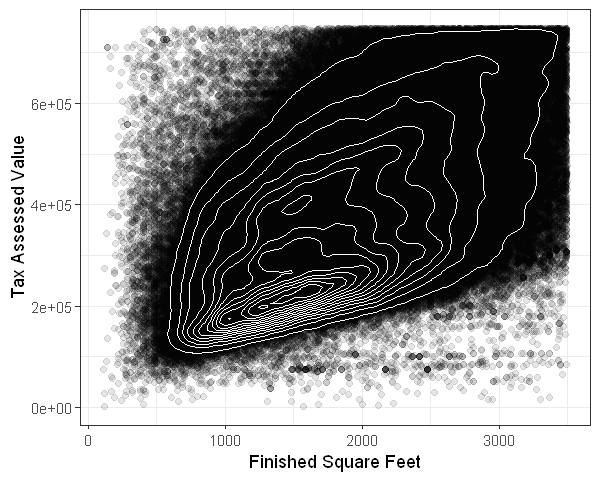

In [30]:
## Code contour
ggplot(kc_tax0, aes(SqFtTotLiving, TaxAssessedValue)) +
  theme_bw() + 
  geom_point( alpha=0.1) + 
  geom_density2d(colour="white") + 
  labs(x="Finished Square Feet", y="Tax Assessed Value")


In [32]:
## Contingency table
library(descr)
lc_loans <- read.csv(file.path('data', 'lc_loans.csv'))

x_tab <- CrossTable(lc_loans$grade, lc_loans$status, 
                    prop.c=FALSE, prop.chisq=FALSE, prop.t=FALSE)

tots <- cbind(row.names(x_tab$tab), format(cbind(x_tab$tab, x_tab$rs)))
props <- cbind("", format(cbind(x_tab$prop.row, x_tab$rs/x_tab$gt), digits=1))
c_tot <- c("Total", format(c(x_tab$cs, x_tab$gt)))

asc_tab <- matrix(nrow=nrow(tots)*2+1, ncol=ncol(tots))
colnames(asc_tab) <- c("Grade", colnames(x_tab$tab), "Total")
idx <- seq(1, nrow(asc_tab)-1, by=2)
asc_tab[idx,] <- tots
asc_tab[idx+1,] <- props
asc_tab[nrow(asc_tab), ] <- c_tot
asc_tab

Grade,Charged Off,Current,Fully Paid,Late,Total
A,1562,50051,20408,469,72490
,0.022,0.690,0.282,0.006,0.161
B,5302,93852,31160,2056,132370
,0.040,0.709,0.235,0.016,0.294
C,6023,88928,23147,2777,120875
,0.050,0.736,0.191,0.023,0.268
D,5007,53281,13681,2308,74277
,0.067,0.717,0.184,0.031,0.165
E,2842,24639,5949,1374,34804
,0.082,0.708,0.171,0.039,0.077


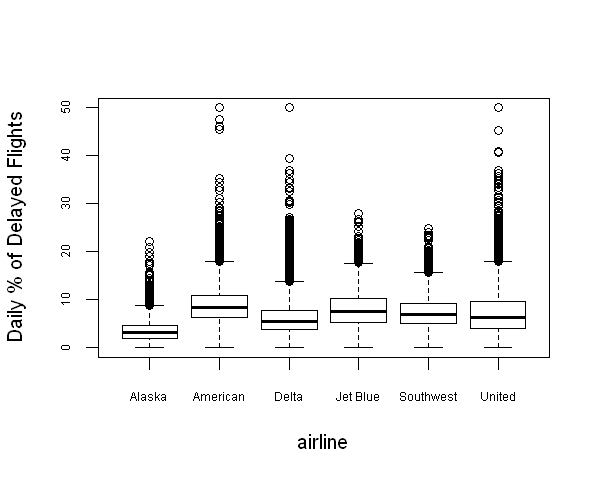

In [35]:
# Multiple boxplots
airline_stats <- read.csv(file.path('data', 'airline_stats.csv'), stringsAsFactors = FALSE)
boxplot(pct_carrier_delay ~ airline, data=airline_stats, ylim=c(0,50), cex.axis=.6,
        ylab="Daily % of Delayed Flights")

Warning message:
"Removed 38 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 38 rows containing non-finite values (stat_ydensity)."Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"

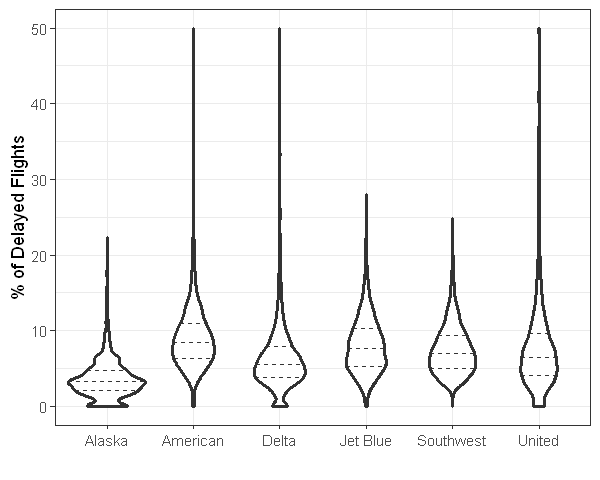

In [38]:
## Code violin plot

ggplot(data=airline_stats, aes(airline, pct_carrier_delay)) + 
  ylim(0, 50) + 
  geom_violin(draw_quantiles = c(.25, .5, .75), linetype=2) +
  geom_violin(fill=NA, size=1.1) +
  theme_bw() + 
  labs(x="", y="% of Delayed Flights")

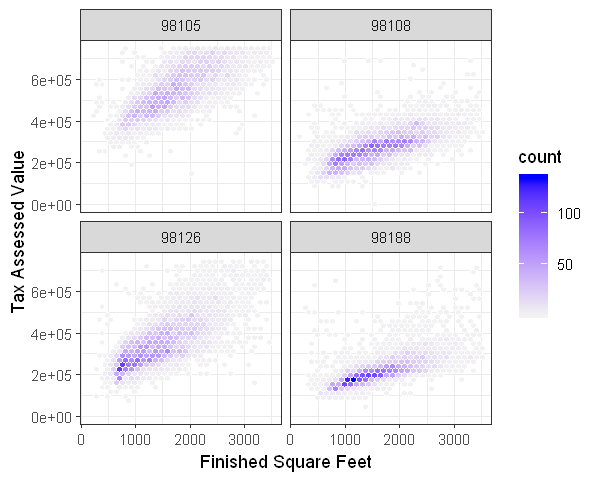

In [39]:
## Code Multiple hexagonal bins

ggplot(subset(kc_tax0, ZipCode %in% c(98188, 98105, 98108, 98126)),
       aes(x=SqFtTotLiving, y=TaxAssessedValue)) + 
  stat_binhex(colour="white") + 
  theme_bw() + 
  scale_fill_gradient( low="gray95", high="blue") +
  labs(x="Finished Square Feet", y="Tax Assessed Value") +
  facet_wrap("ZipCode")